# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19572 sha256=81ae638c559f47882e20e3cf8c00228cbfd038eeeae52fc13c3a6ab01a263ef9
  Stored in directory: c:\users\sunda\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.3
    Uninstalling numpy-1.21.3:
      Successfully uninsta

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
     #                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
      #                       mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
       #                      ) 
    # Draw pose connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
     #                        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
      #                       mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
       #                      ) 
    # Draw left hand connections
    #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
     #                        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
      #                       mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
       #                      ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
draw_landmarks(frame, results)

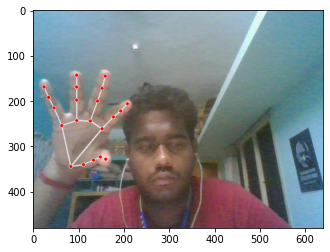

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.right_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404)


In [17]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return np.concatenate([pose, face, lh, rh])
    return rh

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 1.30021960e-01,  7.17860401e-01,  5.20996764e-07,  1.74843267e-01,
        7.09247828e-01, -4.18014713e-02,  2.09219173e-01,  6.88842714e-01,
       -7.03568086e-02,  2.32144207e-01,  6.74318075e-01, -9.73711461e-02,
        2.50433892e-01,  6.83825254e-01, -1.25512421e-01,  2.38489211e-01,
        5.45254946e-01, -5.49609996e-02,  2.76823014e-01,  4.91505772e-01,
       -8.66823494e-02,  3.03103566e-01,  4.62515384e-01, -1.12192564e-01,
        3.25109124e-01,  4.30597544e-01, -1.31942555e-01,  1.98056981e-01,
        5.09842932e-01, -5.98155521e-02,  2.23266393e-01,  4.17959481e-01,
       -8.91298577e-02,  2.37849548e-01,  3.59640956e-01, -1.12416826e-01,
        2.48513654e-01,  3.02460134e-01, -1.30601689e-01,  1.50157452e-01,
        5.07290721e-01, -6.87385499e-02,  1.51520938e-01,  4.12707001e-01,
       -1.01118580e-01,  1.50689438e-01,  3.53591442e-01, -1.24076262e-01,
        1.50339037e-01,  2.98630595e-01, -1.39685944e-01,  9.85656232e-02,
        5.29179513e-01, -

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 1.30021960e-01,  7.17860401e-01,  5.20996764e-07,  1.74843267e-01,
        7.09247828e-01, -4.18014713e-02,  2.09219173e-01,  6.88842714e-01,
       -7.03568086e-02,  2.32144207e-01,  6.74318075e-01, -9.73711461e-02,
        2.50433892e-01,  6.83825254e-01, -1.25512421e-01,  2.38489211e-01,
        5.45254946e-01, -5.49609996e-02,  2.76823014e-01,  4.91505772e-01,
       -8.66823494e-02,  3.03103566e-01,  4.62515384e-01, -1.12192564e-01,
        3.25109124e-01,  4.30597544e-01, -1.31942555e-01,  1.98056981e-01,
        5.09842932e-01, -5.98155521e-02,  2.23266393e-01,  4.17959481e-01,
       -8.91298577e-02,  2.37849548e-01,  3.59640956e-01, -1.12416826e-01,
        2.48513654e-01,  3.02460134e-01, -1.30601689e-01,  1.50157452e-01,
        5.07290721e-01, -6.87385499e-02,  1.51520938e-01,  4.12707001e-01,
       -1.01118580e-01,  1.50689438e-01,  3.53591442e-01, -1.24076262e-01,
        1.50339037e-01,  2.98630595e-01, -1.39685944e-01,  9.85656232e-02,
        5.29179513e-01, -

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Alphabet_all_4') 
#DATA_PATH = os.path.join('Alphabet_complete') 

# Actions that we try to detect
actions = np.array(['A', 'B', 'C','D','E', 'F', 'G','H','I', 'J', 'K','L','M', 'N', 'O','P','Q', 'R', 'S','T','U', 'V', 'W','X','Y', 'Z'])
#actions = np.array(['W','X','Y','Z'])
#actions = np.array(['A', 'B', 'C','D','E', 'F', 'G','H','I'])
#actions = np.array(['W', 'X','Y','Z'])
#actions = np.array(['1', '0'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


# Folder start
start_folder = 0

In [38]:
#for action in actions: 
#    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#    for sequence in range(1,no_sequences+1):
#        try: 
#            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#        except:
#            pass
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass        

# 5. Collect Keypoint Values for Training and Testing

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()


# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(3120, 30, 63)

In [30]:
np.array(labels).shape

(3120,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(3120, 30, 63)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2808, 30, 63)
(312, 30, 63)
(2808, 26)
(312, 26)


# 7. Build and Train LSTM Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
actions.shape[0]

26

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [83]:
model.fit(X_train, y_train, epochs=3000, callbacks=[tb_callback])

Epoch 1/3000
88/88 [==============================] - 7s 36ms/step - loss: 3.1994 - categorical_accuracy: 0.0623
Epoch 2/3000
88/88 [==============================] - 3s 37ms/step - loss: 2.8648 - categorical_accuracy: 0.1004
Epoch 3/3000
88/88 [==============================] - 4s 46ms/step - loss: 2.5053 - categorical_accuracy: 0.1571
Epoch 4/3000
88/88 [==============================] - 3s 37ms/step - loss: 2.2975 - categorical_accuracy: 0.2066
Epoch 5/3000
88/88 [==============================] - 4s 45ms/step - loss: 1.9567 - categorical_accuracy: 0.2867
Epoch 6/3000
88/88 [==============================] - 4s 45ms/step - loss: 1.7140 - categorical_accuracy: 0.3526
Epoch 7/3000
88/88 [==============================] - 4s 47ms/step - loss: 1.5694 - categorical_accuracy: 0.4199
Epoch 8/3000
88/88 [==============================] - 4s 45ms/step - loss: 1.2081 - categorical_accuracy: 0.5666
Epoch 9/3000
88/88 [==============================] - 4s 47ms/step - loss: 1.0600 - categorical_

88/88 [==============================] - 4s 46ms/step - loss: 0.1206 - categorical_accuracy: 0.9594
Epoch 144/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.1650 - categorical_accuracy: 0.9487
Epoch 145/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.3655 - categorical_accuracy: 0.8910
Epoch 146/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.1464 - categorical_accuracy: 0.9537
Epoch 147/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.1891 - categorical_accuracy: 0.9359
Epoch 148/3000
88/88 [==============================] - 4s 50ms/step - loss: 0.1226 - categorical_accuracy: 0.9580
Epoch 149/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0872 - categorical_accuracy: 0.9701
Epoch 150/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.1128 - categorical_accuracy: 0.9640
Epoch 151/3000
88/88 [==============================] - ETA: 0s - loss: 0.0868 - categorical_ac

88/88 [==============================] - 4s 47ms/step - loss: 0.0441 - categorical_accuracy: 0.9840
Epoch 284/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0556 - categorical_accuracy: 0.9790
Epoch 285/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.1702 - categorical_accuracy: 0.9476
Epoch 286/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0663 - categorical_accuracy: 0.9797
Epoch 287/3000
88/88 [==============================] - 4s 49ms/step - loss: 0.0645 - categorical_accuracy: 0.9786
Epoch 288/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.1657 - categorical_accuracy: 0.9476
Epoch 289/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0491 - categorical_accuracy: 0.9843
Epoch 290/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0621 - categorical_accuracy: 0.9797
Epoch 291/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0504 - categoric

88/88 [==============================] - 4s 45ms/step - loss: 0.0725 - categorical_accuracy: 0.9765
Epoch 355/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0327 - categorical_accuracy: 0.9890
Epoch 356/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0365 - categorical_accuracy: 0.9886
Epoch 357/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0424 - categorical_accuracy: 0.9847
Epoch 358/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.2335 - categorical_accuracy: 0.9266
Epoch 359/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0375 - categorical_accuracy: 0.9897
Epoch 360/3000
88/88 [==============================] - 4s 47ms/step - loss: 0.0191 - categorical_accuracy: 0.9936
Epoch 361/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0165 - categorical_accuracy: 0.9957
Epoch 362/3000
88/88 [==============================] - 4s 47ms/step - loss: 0.0193 - categoric

88/88 [==============================] - 4s 45ms/step - loss: 0.0407 - categorical_accuracy: 0.9858
Epoch 495/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.3915 - categorical_accuracy: 0.8967
Epoch 496/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0499 - categorical_accuracy: 0.9886
Epoch 497/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0187 - categorical_accuracy: 0.9954
Epoch 498/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0119 - categorical_accuracy: 0.9968
Epoch 499/3000
88/88 [==============================] - 4s 47ms/step - loss: 0.0235 - categorical_accuracy: 0.9907
Epoch 500/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0236 - categorical_accuracy: 0.9922
Epoch 501/3000
88/88 [==============================] - 4s 47ms/step - loss: 0.0111 - categorical_accuracy: 0.9957
Epoch 502/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0128 - categoric

88/88 [==============================] - 4s 46ms/step - loss: 0.0089 - categorical_accuracy: 0.9975
Epoch 566/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0059 - categorical_accuracy: 0.9979
Epoch 567/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0058 - categorical_accuracy: 0.9979
Epoch 568/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0055 - categorical_accuracy: 0.9979
Epoch 569/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0055 - categorical_accuracy: 0.9975
Epoch 570/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0062 - categorical_accuracy: 0.9972
Epoch 571/3000
88/88 [==============================] - 4s 46ms/step - loss: 0.0052 - categorical_accuracy: 0.9979
Epoch 572/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0052 - categorical_accuracy: 0.9972
Epoch 573/3000
88/88 [==============================] - 4s 45ms/step - loss: 0.0058 - categoric

KeyboardInterrupt: 

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            32768     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 26)                858       
                                                                 
Total params: 188,090
Trainable params: 188,090
Non-trai

# 8. Make Predictions

In [42]:
res = model.predict(X_test)

In [43]:
actions[np.argmax(res[3])]

'Z'

In [44]:
actions[np.argmax(y_test[3])]

'K'

# 9. Save Weights

In [91]:
model.save('alphabet_30_30_all_4.h5')

In [60]:
del model

In [45]:
model.load_weights('alphabet_30_30_all_4.h5')



# 10. Evaluation using Confusion Matrix and Accuracy

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_test)

In [48]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [49]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[297,   0],
        [  0,  15]],

       [[302,   0],
        [  0,  10]],

       [[302,   0],
        [  0,  10]],

       [[301,   0],
        [  0,  11]],

       [[298,   0],
        [  0,  14]],

       [[294,   0],
        [  0,  18]],

       [[301,   0],
        [  0,  11]],

       [[303,   0],
        [  0,   9]],

       [[303,   1],
        [  0,   8]],

       [[301,   0],
        [  1,  10]],

       [[306,   0],
        [  0,   6]],

       [[301,   2],
        [  0,   9]],

       [[301,   0],
        [  0,  11]],

       [[298,   0],
        [  0,  14]],

       [[298,   0],
        [  0,  14]],

       [[305,   0],
        [  0,   7]],

       [[292,   0],
        [  0,  20]],

       [[306,   0],
        [  0,   6]],

       [[306,   0],
        [  0,   6]],

       [[302,   0],
        [  0,  10]],

       [[296,   0],
        [  0,  16]],

       [[298,   0],
        [  0,  14]],

       [[295,   0],
        [  2,  15]],

       [[303,   0],
        [  0, 

In [50]:
accuracy_score(ytrue, yhat)

0.9903846153846154

In [51]:
y_pred = []
y_act = []
#print(y_act)
for i in range(len(yhat)):
    y_act.append(actions[ytrue[i]])
    y_pred.append(actions[yhat[i]])

    



In [119]:
from sklearn import metrics
import pandas as pd
# Predicted values
#y_pred = ["a", "b", "c", "a", "b"]
# Actual values
#y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
c_matrix = metrics.confusion_matrix(y_act, y_pred, labels=actions)
print(c_matrix)
#c_matrix.to_csv('c_matrix.csv')
# Printing the precision and recall, among other metrics
c_report = metrics.classification_report(y_act, y_pred, labels=actions)
print(c_report)
#c_report.to_csv('c_report.csv')

#df_confusion = pd.crosstab(y_act, y_pred)
#print(df_confusion)
#c_report.to_csv('df_confusion.csv')

[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

In [125]:
import numpy as np
#a = np.asarray([ [1,2,3], [4,5,6], [7,8,9] ])

a = np.asarray( c_matrix  )
#a.tofile('foo.csv',sep=',',format='%10.5f')
#a

import csv

#a= [[1,2,3,4],[5,6,7,8]]

with open("foo.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(a)

In [130]:
import numpy as np
#a = np.asarray([ [1,2,3], [4,5,6], [7,8,9] ])

a = np.asarray( c_report  )
#a.tofile('foo.csv',sep=',',format='%10.5f')
a

#import csv

#a= [[1,2,3,4],[5,6,7,8]]

#with open("boo.csv", "w") as f:
 #   writer = csv.writer(f)
 #   writer.writerows(a)

array('              precision    recall  f1-score   support\n\n           A       1.00      1.00      1.00        13\n           B       1.00      1.00      1.00        12\n           C       1.00      1.00      1.00        13\n           D       1.00      1.00      1.00        15\n           E       1.00      1.00      1.00         8\n           F       1.00      1.00      1.00        12\n           G       1.00      1.00      1.00        16\n           H       1.00      1.00      1.00         9\n           I       1.00      1.00      1.00        10\n           J       1.00      1.00      1.00        11\n           K       1.00      1.00      1.00         9\n           L       0.94      1.00      0.97        15\n           M       0.94      1.00      0.97        17\n           N       1.00      1.00      1.00        12\n           O       1.00      1.00      1.00        10\n           P       1.00      1.00      1.00        10\n           Q       0.92      1.00      0.96        12\n 

# 11. Test in Real Time

In [52]:
from scipy import stats

In [53]:
#colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if(.1<=prob<=1):
            
            cv2.rectangle(output_frame, (0,60+40), (int(prob*100), 90+40), (16,117,245), -1)
            #cv2.putText(output_frame, actions[num]+str(prob), (0, 85+40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            cv2.putText(output_frame, actions[num]+str(prob), (0, 85+40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [49]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, (16,117,245)))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1296x1296 with 0 Axes>

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 2: 
                sentence = sentence[-2:]

            # Viz probabilities
            image = prob_viz(res, actions, image, (16,117,245))
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        if (len(sentence)>1):
            cv2.putText(image, ' '.join(sentence), (3,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
B
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>


<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
G
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Q
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I
1
<class

L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
F
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
1
1
1
<class 'mediapipe.python.solution_base.SolutionOu

Y
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Y
1
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
J
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
J
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
J
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
J
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
J
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Z
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Z
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Z
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Z
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Z
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S
1
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'

L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
L
1
1
<class 'mediapipe.python.solution_base.SolutionOu

In [62]:
# Import the required module for text
# to speech conversion
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os

# The text that you want to convert to audio
mytext = 'Welcome to geeksforgeeks!'

# Language in which you want to convert
language = 'en'

# Passing the text and language to the engine,
# here we have marked slow=False. Which tells
# the module that the converted audio should
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)

# Saving the converted audio in a mp3 file named
# welcome
myobj.save("welcome.mp3")

# Playing the converted file
os.system("mpg321 welcome.mp3")


1

In [60]:
!pip install gtts

You should consider upgrading via the 'c:\users\sunda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
